# Mini-Project : Data Analysis for Marketing Strategy


## Introduction
In this mini-project, we will perform data analysis to devise a marketing strategy based on various aspects like area analysis, customer analysis, product category analysis, and sales and profit time series.



## 👩‍🏫 👩🏿‍🏫 What You’ll learn
How to load and preprocess a dataset.
Techniques for area analysis to identify key markets.
Methods for customer analysis to determine high-value customers.
Strategies for product category analysis to identify top-performing products.
How to analyze sales and profit trends over time.
Application of the Pareto Principle to prioritize key drivers of sales and profit.


## Dataset
The US Superstore Dataset contains the following attributes:

Row ID: Unique ID for each row.
Order ID: Unique Order ID for each Customer.
Order Date: Order Date of the product.
Ship Date: Shipping Date of the Product.
Ship Mode: Shipping Mode specified by the Customer.
Customer ID: Unique ID to identify each Customer.
Customer Name: Name of the Customer.
Segment: The segment where the Customer belongs.
Country: Country of residence of the Customer.
City: City of residence of the Customer.
State: State of residence of the Customer.
Postal Code: Postal Code of every Customer.
Region: Region where the Customer belongs.
Product ID: Unique ID of the Product.
Category: Category of the product ordered.
Sub-Category: Sub-Category of the product ordered.
Product Name: Name of the Product.
Sales: Sales of the Product.
Quantity: Quantity of the Product.
Discount: Discount provided.
Profit: Profit/Loss incurred.


## Task
First load the dataset in a notebook and preprocess it. Then use visualisations to address the following questions:

* Which states have the most sales?
* What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
* Who is an outstanding customer in New York?
* Are there any differences among states in profitability?
* The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. * It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)
* What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)
* What are the Top 20 customers by Sales?
Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?
* Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.


##  1 Chargement des bibliothèques et des données

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lecture du fichier .xls depuis le bureau
file_path = r"C:\Users\chume\Desktop\US_Superstore data.xls"
df = pd.read_excel(file_path, engine="xlrd")

# Conversion des dates
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 2 États avec le plus de ventes

C:\Users\chume\AppData\Local\Temp\ipykernel_3660\272014325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette="viridis")


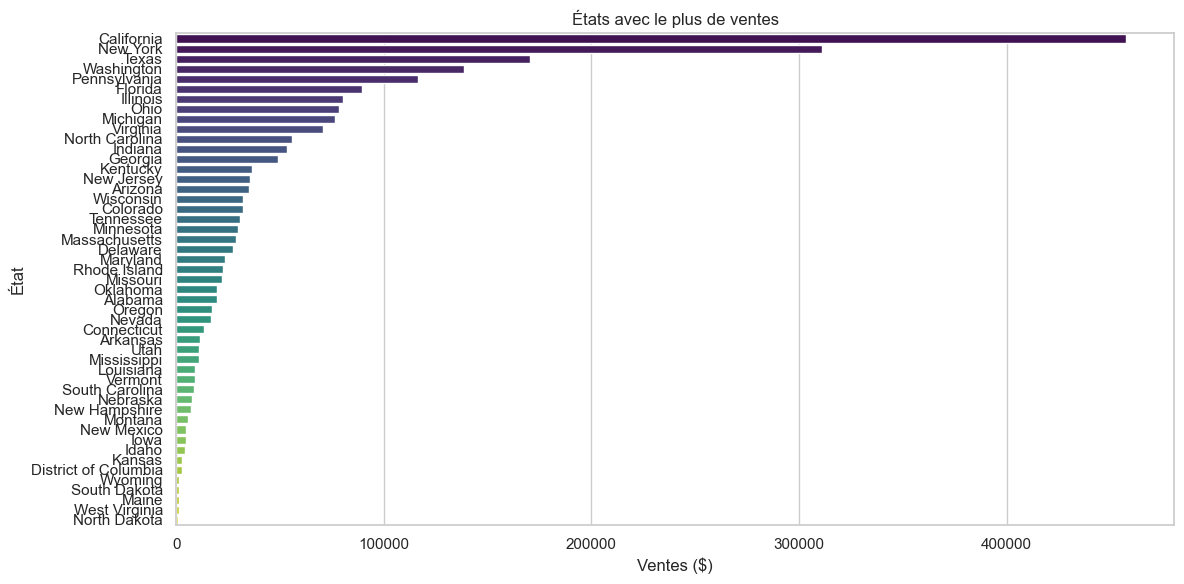

In [25]:
# Total des ventes par état
state_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.values, y=state_sales.index, palette="viridis")
plt.title("États avec le plus de ventes")
plt.xlabel("Ventes ($)")
plt.ylabel("État")
plt.tight_layout()
plt.show()


## 3  Comparaison New York vs California

In [26]:
ny = df[df["State"] == "New York"]
ca = df[df["State"] == "California"]

print("New York - Ventes totales :", round(ny["Sales"].sum(), 2))
print("New York - Profit total :", round(ny["Profit"].sum(), 2))
print("California - Ventes totales :", round(ca["Sales"].sum(), 2))
print("California - Profit total :", round(ca["Profit"].sum(), 2))


New York - Ventes totales : 310876.27
New York - Profit total : 74038.55
California - Ventes totales : 457687.63
California - Profit total : 76381.39


## 4 Meilleur client à New York

In [27]:
ny_customer = ny.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(1)
ny_customer


Customer Name
Tom Ashbrook    13723.498
Name: Sales, dtype: float64

## 5 Rentabilité par État

C:\Users\chume\AppData\Local\Temp\ipykernel_3660\901508714.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_profit.values, y=state_profit.index, palette="coolwarm")


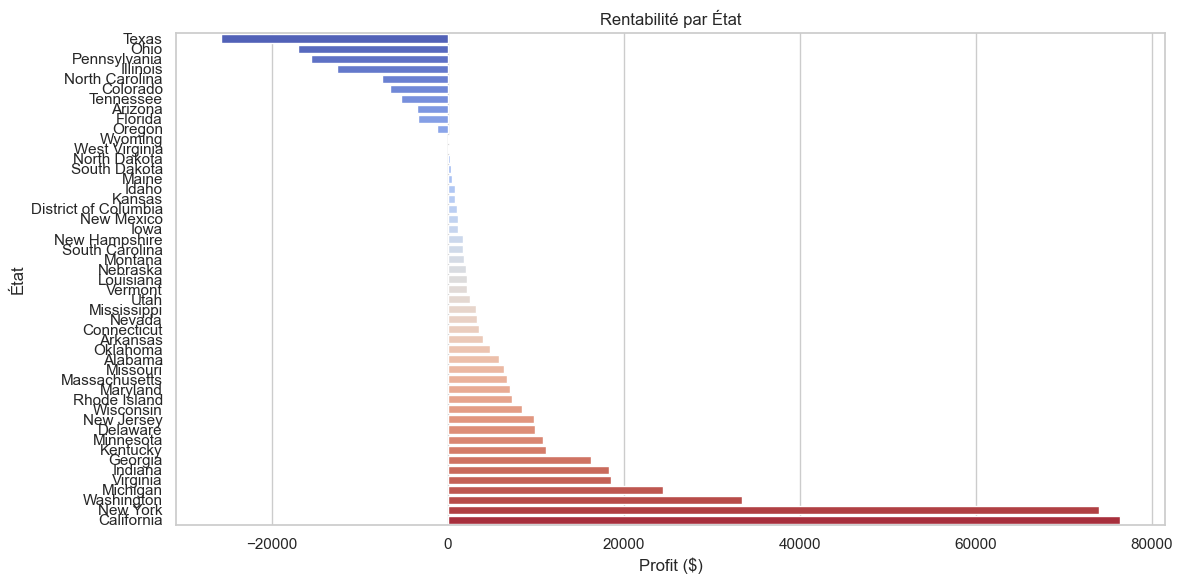

In [28]:
state_profit = df.groupby("State")["Profit"].sum().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_profit.values, y=state_profit.index, palette="coolwarm")
plt.title("Rentabilité par État")
plt.xlabel("Profit ($)")
plt.ylabel("État")
plt.tight_layout()
plt.show()


## 6 Principe de Pareto sur le Profit par client

In [29]:
profit_by_customer = df.groupby("Customer ID")["Profit"].sum().sort_values(ascending=False)
cumulative_profit = profit_by_customer.cumsum()
total_profit = profit_by_customer.sum()
cutoff = cumulative_profit[cumulative_profit <= 0.8 * total_profit]

print("Nombre total de clients :", len(profit_by_customer))
print("Clients représentant 80% du profit :", len(cutoff), "→", round(100 * len(cutoff)/len(profit_by_customer), 2), "%")


Nombre total de clients : 793
Clients représentant 80% du profit : 152 → 19.17 %


## 7  Top 20 villes par ventes et profits

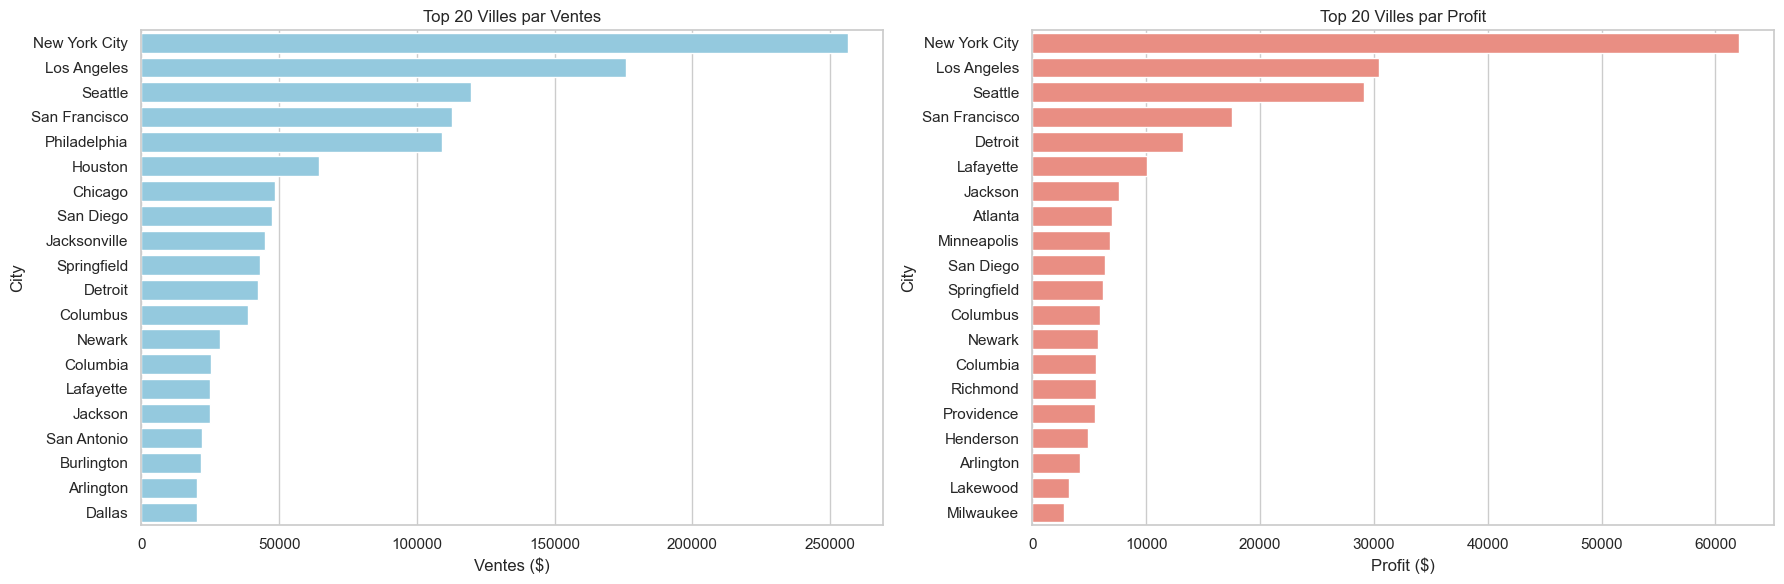

In [30]:
top_sales_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(20)
top_profit_cities = df.groupby("City")["Profit"].sum().sort_values(ascending=False).head(20)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=top_sales_cities.values, y=top_sales_cities.index, ax=axes[0], color='skyblue')
axes[0].set_title("Top 20 Villes par Ventes")
axes[0].set_xlabel("Ventes ($)")

sns.barplot(x=top_profit_cities.values, y=top_profit_cities.index, ax=axes[1], color='salmon')
axes[1].set_title("Top 20 Villes par Profit")
axes[1].set_xlabel("Profit ($)")

plt.tight_layout()
plt.show()


## 8 Top 20 clients par ventes

C:\Users\chume\AppData\Local\Temp\ipykernel_3660\653200872.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers_sales.values, y=top_customers_sales.index, palette="mako")


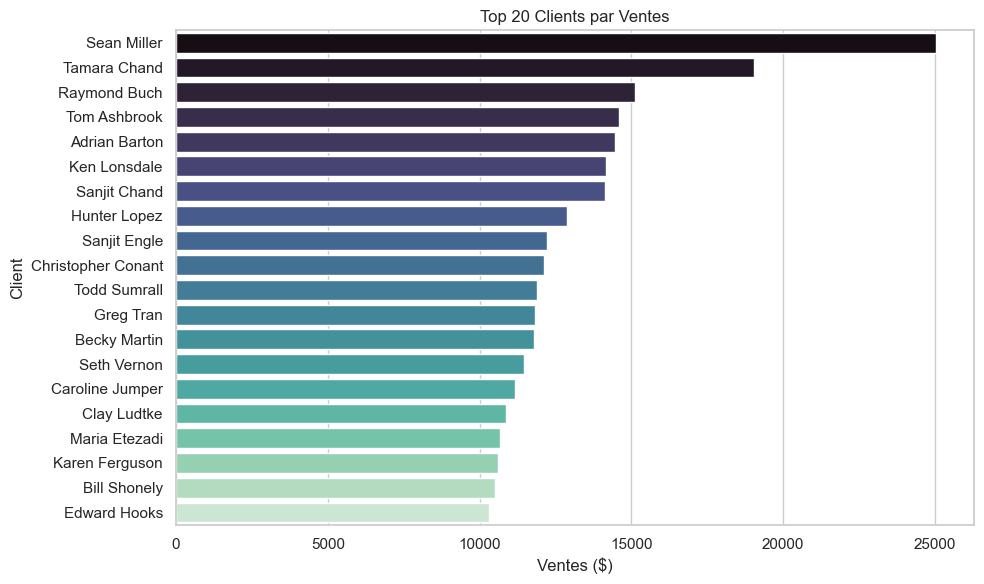

In [31]:
top_customers_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers_sales.values, y=top_customers_sales.index, palette="mako")
plt.title("Top 20 Clients par Ventes")
plt.xlabel("Ventes ($)")
plt.ylabel("Client")
plt.tight_layout()
plt.show()


## 9 Courbe cumulative de ventes clients (Pareto)

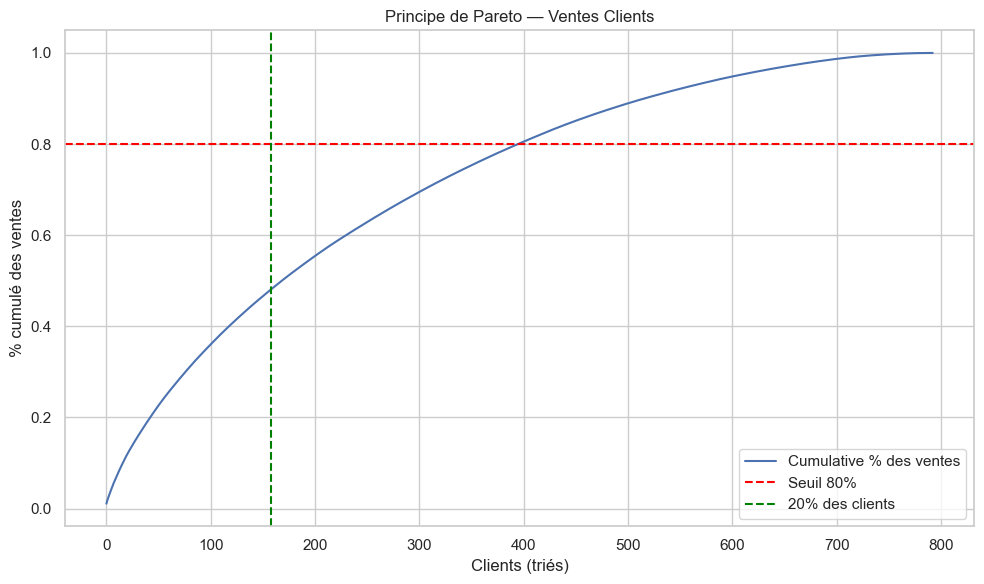

In [32]:
sales_by_customer = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)
cumulative_sales = sales_by_customer.cumsum()
total_sales = sales_by_customer.sum()

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(sales_by_customer)), cumulative_sales / total_sales, label="Cumulative % des ventes")
plt.axhline(0.8, color='red', linestyle='--', label="Seuil 80%")
plt.axvline(int(len(sales_by_customer)*0.2), color='green', linestyle='--', label="20% des clients")
plt.title("Principe de Pareto — Ventes Clients")
plt.xlabel("Clients (triés)")
plt.ylabel("% cumulé des ventes")
plt.legend()
plt.tight_layout()
plt.show()


## 10 Réponses analytiques aux questions du mini-projet

### 1. **États avec le plus de ventes**

La Californie domine très largement avec **457 687 \$** de ventes, suivie de **New York** (310 876 \$), **Texas**, et **Washington**.

---

### 2. **Comparaison New York vs Californie**

* **Ventes** : Californie (**457 688 \$**) > New York (**310 876 \$**)
* **Profit** : Californie (**76 381 \$**) > New York (**74 039 \$**)
  Californie est donc à la fois **leader en chiffre d'affaires et légèrement en profit**, malgré un plus grand volume.

---

### 3. **Client remarquable à New York**

 **Tom Ashbrook** est le meilleur client de New York avec **13 723 \$** de ventes.

---

### 4. **Différences de rentabilité entre États**

Certains États sont **structurellement déficitaires** malgré de bonnes ventes :

* **Texas, Ohio, Pennsylvanie** → pertes importantes
  À l'inverse, **Californie et New York** combinent **fortes ventes et hauts profits**.

---

### 5. **Principe de Pareto appliqué au profit**

 Sur 793 clients :

* **152 clients** (≈ **19,17 %**) génèrent **80 % du profit**
  Le **principe de Pareto s'applique bien au profit client**.

---

### 6. **Top 20 villes par ventes vs par profit**

* **Ventes** : New York City, Los Angeles, Seattle
* **Profit** : New York City, Los Angeles, Seattle
   Certaines villes comme **Philadelphia ou Chicago** vendent beaucoup mais sont **moins rentables** que d'autres comme **Lafayette ou Jackson**, qui ressortent dans le top profit.

---

### 7. **Top 20 clients par ventes**

 **Sean Miller**, **Tamara Chand** et **Raymond Buch** sont les **plus gros contributeurs au CA**, tous dépassant **15 000 \$** de ventes.

---

### 8. **Pareto — Ventes par client**

 Le graphique montre que **160 clients (≈ 20 %)** génèrent **80 % du CA**.
 Le **principe de Pareto est confirmé aussi pour les ventes**.

---

### 9. **Recommandations Marketing**

 Pour une stratégie efficace :

* **Cibler** les **États rentables** : Californie, New York, Washington
* **Investir dans les villes à double performance** (ventes + profits) : New York City, Seattle
* **Fidéliser les 20 % de clients clés** en priorité
* **Réévaluer** les politiques de réduction dans les États en perte structurelle (ex : Texas)
